In [95]:
#Importing all the required libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from math import sqrt
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split

In [96]:
#Reading the csv file and printing no. of rows and columns
df=pd.read_csv("housing (1).csv")
print(df.shape)

(20640, 10)


In [97]:
#Displaying the first 10 data values
df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200
5,-122.25,37.85,52,919,213.0,413,193,4.0368,NEAR BAY,269700
6,-122.25,37.84,52,2535,489.0,1094,514,3.6591,NEAR BAY,299200
7,-122.25,37.84,52,3104,687.0,1157,647,3.1200,NEAR BAY,241400
8,-122.26,37.84,42,2555,665.0,1206,595,2.0804,NEAR BAY,226700
9,-122.25,37.84,52,3549,707.0,1551,714,3.6912,NEAR BAY,261100


In [98]:
#Data description
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


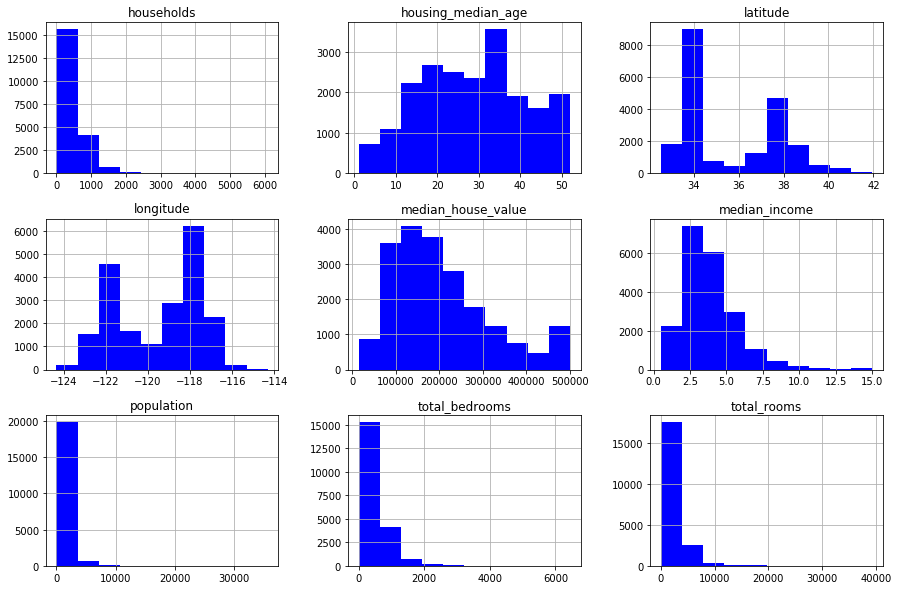

In [99]:
#Plotting histograms for each feature in the data set
import matplotlib.pyplot as plt
df.hist(figsize=(15,10), color = 'blue')
plt.show()

In [100]:
#Finding the missing values
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [101]:
#Replacing the missing values with mean
df['total_bedrooms'] = df['total_bedrooms'].fillna(np.mean(df['total_bedrooms']))

In [102]:
#Checking if there are still any missing values
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

In [103]:
#Checking for standard data
df.dtypes

longitude             float64
latitude              float64
housing_median_age      int64
total_rooms             int64
total_bedrooms        float64
population              int64
households              int64
median_income         float64
ocean_proximity        object
median_house_value      int64
dtype: object

In [104]:
#Converting and standardizing the data
df['housing_median_age'] = df.housing_median_age.astype(float)
df['total_rooms'] = df.total_rooms.astype(float)
df['population'] = df.population.astype(float)
df['households'] = df.households.astype(float)
df['median_house_value'] = df.median_house_value.astype(float)

In [105]:
#Checking the result of standardization
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
ocean_proximity        object
median_house_value    float64
dtype: object

In [106]:
#One hot encoding of object type feature
dummy = pd.get_dummies(df['ocean_proximity'])
df = pd.concat([df, dummy], axis=1)

In [107]:
#Checking the result of one hot encoding
df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY,342200.0,0,0,0,1,0
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,NEAR BAY,269700.0,0,0,0,1,0
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,NEAR BAY,299200.0,0,0,0,1,0
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,NEAR BAY,241400.0,0,0,0,1,0
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,NEAR BAY,226700.0,0,0,0,1,0
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,NEAR BAY,261100.0,0,0,0,1,0


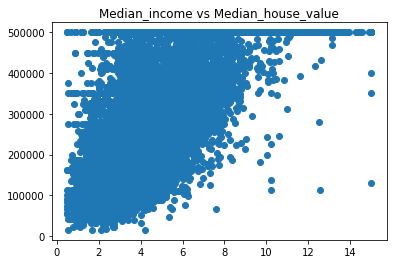

In [108]:
#Scatter plot of the median income and median house value
plt.scatter(df.median_income,df.median_house_value)
plt.title("Median_income vs Median_house_value")
plt.show()

In [109]:
#Selecting the input(X) and output(y) variables
X = df.drop(df.columns[[8, 9]], axis = 1)
y = df['median_house_value']

In [110]:
#Input(X)
X.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,0,0,0,1,0
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,0,0,0,1,0
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,0,0,0,1,0
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,0,0,0,1,0
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,0,0,0,1,0
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,0,0,0,1,0


In [111]:
#Output(Y)
y.head(10)

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
5    269700.0
6    299200.0
7    241400.0
8    226700.0
9    261100.0
Name: median_house_value, dtype: float64

In [112]:
#Splitting the data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size =0.2,random_state = 123)

In [113]:
#Printing no. of rows and columns in each category
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(16512, 13)
(4128, 13)
(16512,)
(4128,)


In [114]:
#Linear regression
lin = LinearRegression()
lin.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [115]:
#Root mean square error in linear regression
pred = lin.predict(X_test)
rmse = (sqrt(mean_squared_error(y_test,pred)))
print("The root mean square error is : "+ str(rmse))

The root mean square error is : 68732.03768157016


In [116]:
#Decision tree
dtree_regr = DecisionTreeRegressor(max_depth=10)
dtree_regr.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [117]:
#Rmse , accuracy and r2 score in decision tree
dtree_pred = dtree_regr.predict(X_test)
print("Root Mean Squared error = " + str(sqrt(mean_squared_error(y_test, dtree_pred))))
dtree_accuracy = dtree_regr.score(X_test,y_test)
print("Accuracy = " + str(dtree_accuracy*100))
print("R2_score = " + str(r2_score(y_test,dtree_pred)))

Root Mean Squared error = 58507.03748205311
Accuracy = 74.2590087638537
R2_score = 0.742590087638537


In [118]:
#Random forest
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [119]:
#Rmse , accuracy and r2 score in random forest
rf_pred = rf.predict(X_test)
print("Root Mean Squared Error = " + str(sqrt(mean_squared_error(y_test,rf_pred))))
rf_acc = rf.score(X_test,y_test)
print("Accuracy = " + str(rf_acc*100))
print("R2 score = " + str(r2_score(y_test,rf_pred)))

Root Mean Squared Error = 49470.12552317883
Accuracy = 81.5967267190115
R2 score = 0.815967267190115


In [120]:
#Bonus Exercise - Pediction using only one input variable
x1 = df.iloc[:, 7].values
y1 = df.iloc[:, 9].values

In [121]:
#Splitting train and test data and reshaping them
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size= 0.2, random_state=132)
x1_train= x1_train.reshape(-1, 1)
y1_train= y1_train.reshape(-1, 1)
x1_test = x1_test.reshape(-1, 1)

In [122]:
#Linear regression
lrg = LinearRegression()
lrg.fit(x1_train,y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [123]:
#Finding the rmse and accuracy
pred_value = lrg.predict(x1_test)
rmse1 = sqrt(mean_squared_error(y1_test,pred_value))
print("Root Mean Square Error = " + str(rmse1))
accuracy1 = rg.score(x1_test,y1_test)
print("Accuracy = " + str(accuracy1*100))

Root Mean Square Error = 81914.72299088836
Accuracy = 48.079531051869154


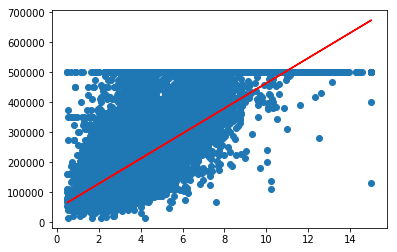

In [124]:
#Scatter plot for the test data and predicted value
plt.scatter(x1_train, y1_train)
plt.plot(x1_test, pred_value, color='red')
plt.show()

Text(0,0.5,'Predicted median_house_value')

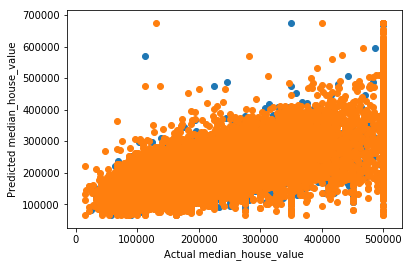

In [125]:
plt.scatter(y1_test, pred_value)
plt.scatter(y1_train, lrg.predict(x1_train))
plt.xlabel("Actual median_house_value")
plt.ylabel("Predicted median_house_value")